# Clustering & Linear Regression in Python

We have already seen how to apply clustering and linear regression estimation using R in Data 180: Intro to Data Science. We will now demonstrate how to implement these methods in Python.


## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In each iteration of the algorithm, WGSS is checked. The partition with WGSS is the final output of the algorithm. In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [1]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [2]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1) # recall k must be specified beforehand
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [3]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments. 

In [4]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0,0.5,'SSE')

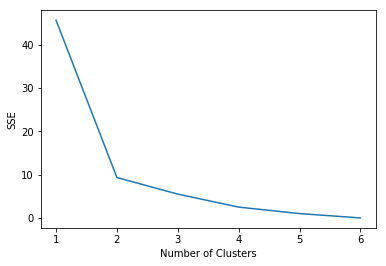

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## 8.2 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average.

In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### Single Linkage (MIN)

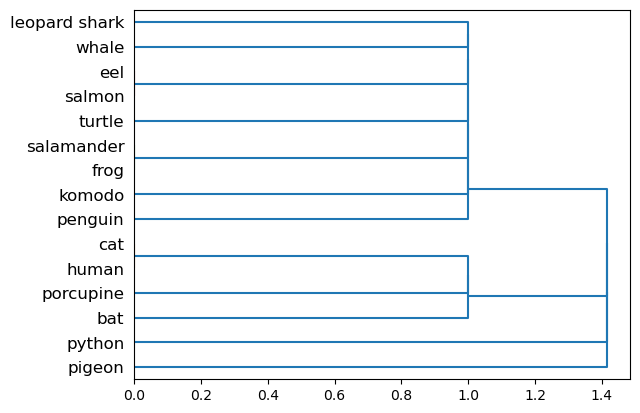

In [5]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Complete Linkage (MAX)

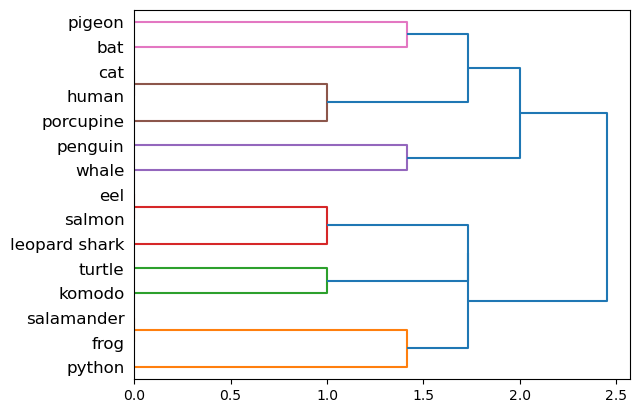

In [6]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### Group Average

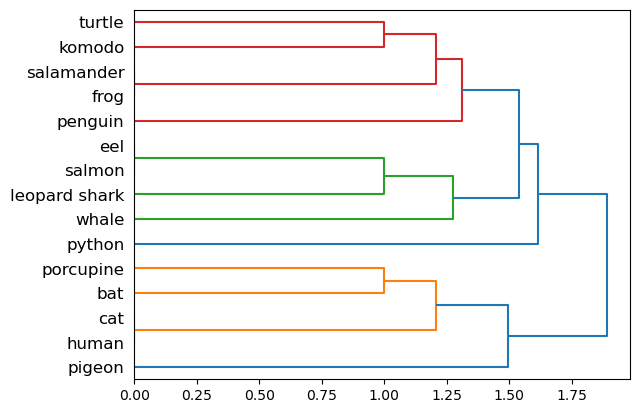

In [7]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

# Linear regression

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

big_mac = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-12-22/big-mac.csv')

In [91]:
big_mac

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,eur_raw,gbp_raw,jpy_raw,cny_raw,gdp_dollar,adj_price,usd_adjusted,eur_adjusted,gbp_adjusted,jpy_adjusted,cny_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.0000,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.6800,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.7900,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.4700,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.7000,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2020-07-01,UKR,UAH,Ukraine,59.00,27.1300,2.174714,-0.61914,-0.54562,-0.49157,-0.40181,-0.29813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,2020-07-01,URY,UYU,Uruguay,189.00,43.6750,4.327418,-0.24213,-0.09584,0.01171,0.19032,0.39664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,2020-07-01,USA,USD,United States,5.71,1.0000,5.710000,0.00000,0.19303,0.33494,0.57062,0.84286,62868.917,5.174502,0.000,-0.019,0.122,0.279,0.070
1384,2020-07-01,VNM,VND,Vietnam,66000.00,23180.0000,2.847282,-0.50135,-0.40510,-0.33433,-0.21681,-0.08106,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
big_mac['gdp_dollar'] = big_mac['gdp_dollar']/1000

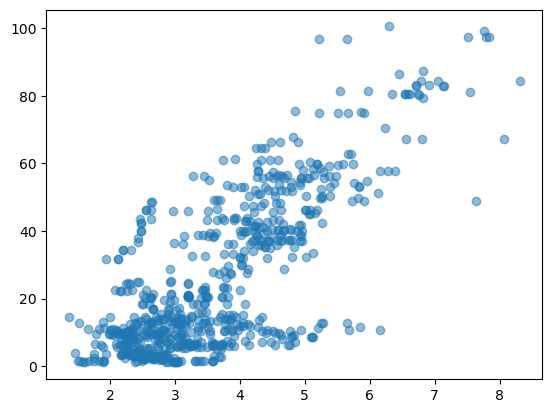

In [94]:
plt.scatter(big_mac.dollar_price, big_mac.gdp_dollar,alpha=.5)
plt.show()

In [95]:
result = sm.ols(formula="gdp_dollar ~ dollar_price", data=big_mac).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_dollar   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     977.7
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          5.42e-135
Time:                        19:46:40   Log-Likelihood:                -2884.1
No. Observations:                 702   AIC:                             5772.
Df Residuals:                     700   BIC:                             5781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -24.7728      1.716    -14.436   

In [98]:
result.params

Intercept      -24.772829
dollar_price    13.896793
dtype: float64

In [102]:
a,b = result.params
print(a,b)

-24.772829455610754 13.896792756929226


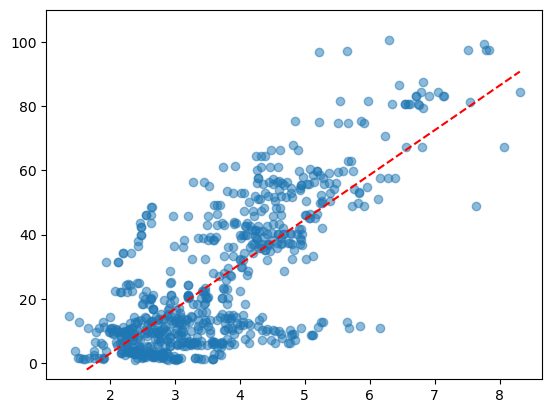

In [128]:
xrange = np.linspace(min(big_mac.dollar_price)+1,max(big_mac.dollar_price),100)
y_hat = a + b*xrange

plt.scatter(big_mac.dollar_price, big_mac.gdp_dollar,alpha=.5)
plt.plot(xrange, y_hat,linestyle='dashed',color='red')
plt.ylim(-5,110)
plt.show()

# Non-linear regression

In [129]:
big_mac['dollar_pricesq'] = big_mac['dollar_price']**2
result = sm.ols(formula="gdp_dollar ~ dollar_price + dollar_pricesq", data=big_mac).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_dollar   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     512.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.15e-137
Time:                        19:54:42   Log-Likelihood:                -2874.3
No. Observations:                 702   AIC:                             5755.
Df Residuals:                     699   BIC:                             5768.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.9183      4.344     -1.

In [144]:
a,b,c = np.round(result.params,2)
print(a,b,c)

-6.92 4.34 1.14


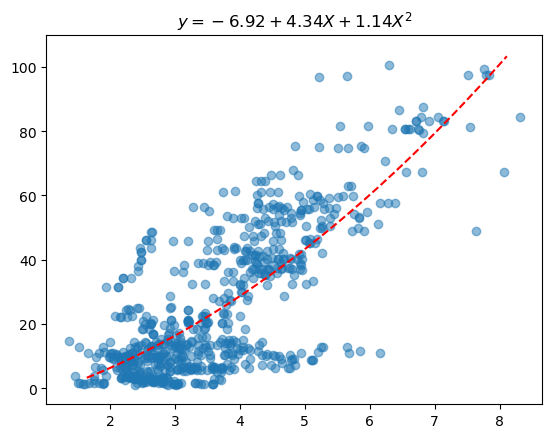

In [147]:
xrange = np.linspace(min(big_mac.dollar_price)+1,max(big_mac.dollar_price)-.2,100)
y_hat = a + b*xrange + c*xrange**2

plt.scatter(big_mac.dollar_price, big_mac.gdp_dollar,alpha=.5)
plt.title('$y = {} + {}X + {}X^2$'.format(a,b,c))
plt.plot(xrange, y_hat,linestyle='dashed',color='red')
plt.ylim(-5,110)
plt.show()

## Summary

This tutorial illustrates examples of using different Python's implementation of clustering algorithms. Algorithms such as k-means, spectral clustering, and DBScan are designed to create disjoint partitions of the data whereas the single-link, complete-link, and group average algorithms are designed to generate a hierarchy of cluster partitions.